In [1]:
#Name Daniel Dinelli
#Student Number C00242741
#Looked at this example https://www.datacamp.com/community/tutorials/decision-tree-classification-python
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [7]:
from sklearn.tree import export_graphviz

In [8]:
from six import StringIO

In [9]:
from IPython.display import Image 

In [10]:
import pydotplus

In [11]:
dp = pd.read_csv("newinjuryData.csv")

In [12]:
dp = dp.drop(columns=['Unnamed: 0'])

In [13]:
dp.to_csv('data.csv')

In [14]:
#label columns
col_names = ['Skill Level','Injured Before','Age', 'Gender', 'Activity', 'Injury type']

In [15]:
classTree = pd.read_csv("data.csv", header=None, names=col_names)

In [16]:
classTree = classTree.iloc[1: , :]

In [17]:
labelencoder = LabelEncoder()
classTree.head(10)

,Skill Level,Injured Before,Age,Gender,Activity,Injury type
0.0,professional,no,36-50,F,Hockey,Lower Back Pain
1.0,professional,no,65-80,F,Soccer,Sprains
2.0,Casual,no,18-36,F,Cycling,Lower Back Pain
3.0,amateur,yes,18-36,M,Skateboarding,Plantar Fasciitis
4.0,amateur,yes,50-65,M,Rugby,Lower Back Pain
5.0,professional,no,65-80,F,Weightlifting,Plantar Fasciitis
6.0,amateur,yes,36-50,F,Hockey,Lower Back Pain
7.0,Casual,no,65-80,F,Tennis,Sprains
8.0,amateur,yes,18-36,M,Dancing,Lower Back Pain
9.0,Casual,no,65-80,F,Tennis,Plantar Fasciitis


In [18]:
#encode data to numeric values
classTree['Gender'] = labelencoder.fit_transform(classTree['Gender'])

In [19]:
classTree['Skill Level'] = labelencoder.fit_transform(classTree['Skill Level'])

In [20]:
classTree['Injured Before'] = labelencoder.fit_transform(classTree['Injured Before'])

In [21]:
classTree['Activity'] = labelencoder.fit_transform(classTree['Activity'])

In [22]:
classTree['Age'] = labelencoder.fit_transform(classTree['Age'])

In [23]:
classTree['Injury type'] = labelencoder.fit_transform(classTree['Injury type'])

In [24]:
sortedDF = classTree.sort_values('Injury type')

In [25]:
feature_cols = ['Skill Level','Injured Before','Age','Gender','Activity']

In [26]:
target_cols = ['Injury type']

In [27]:
X = classTree[feature_cols]

In [28]:
y = classTree[target_cols]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
clf = DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=6,max_features=2,min_samples_leaf=2)#entropy

In [31]:
clf = clf.fit(X_train,y_train)

In [32]:
y_pred = clf.predict(X_train)

In [33]:
print(y_train_pred)

NameError: name 'y_train_pred' is not defined

In [37]:
print('Training accuracy: ',clf.score(X_train,y_train))
print('Test Accuracy: ',clf.score(X_test,y_test))

Training accuracy:  0.257
Test Accuracy:  0.195


In [38]:
names = ['Skill Level','Injured Before','Age','Gender','Activity']

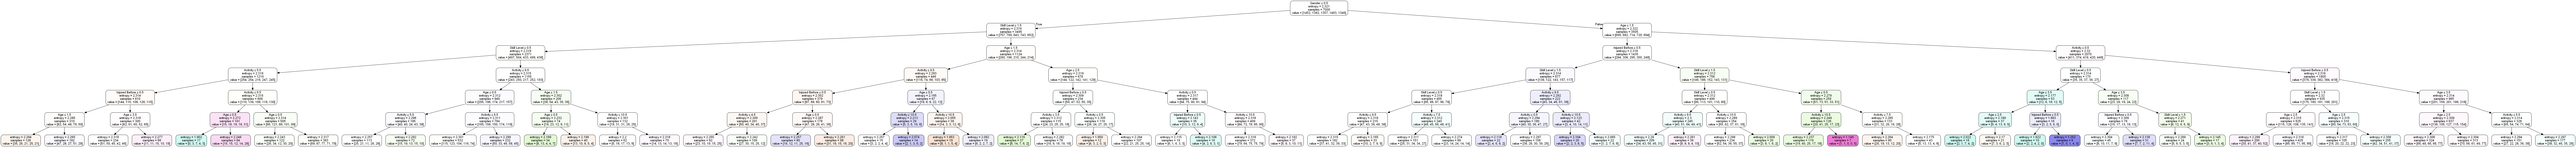

In [39]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('newTree.png')
Image(graph.create_png())

In [40]:
#save model as pickle file
import pickle

In [41]:
with open('decsionTree_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [42]:
with open('decsionTree_model.pkl', 'rb') as f:
    clf_loaded = pickle.load(f)

In [43]:
clf_loaded

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=2,
                       min_samples_leaf=2)